In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading dataset
df = pd.read_csv('creditcard.csv')

In [3]:
#top 5rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking shape of data(rows and columns)
df.shape

(284807, 31)

In [5]:
#infromation about data(missing value,data types,no. of rows & colums)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
import dtale
dtale.show(df)

2020-10-02 20:04:20,196 - INFO     - NumExpr defaulting to 4 threads.


In [7]:
#counting total value in class colums
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of Amount')

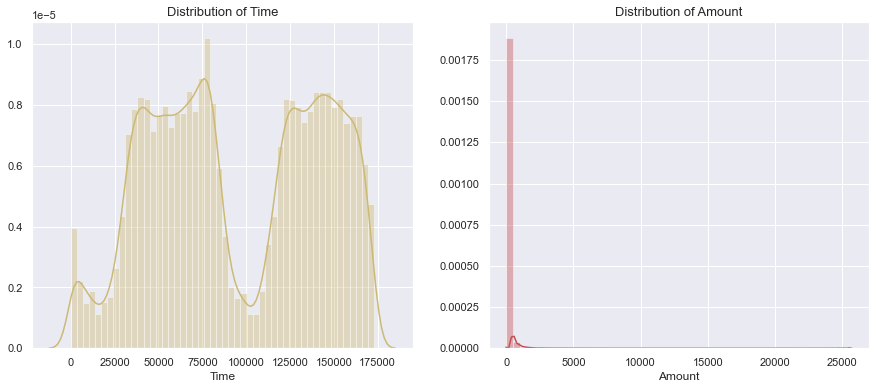

In [8]:
#visualising distributio between time and amount
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

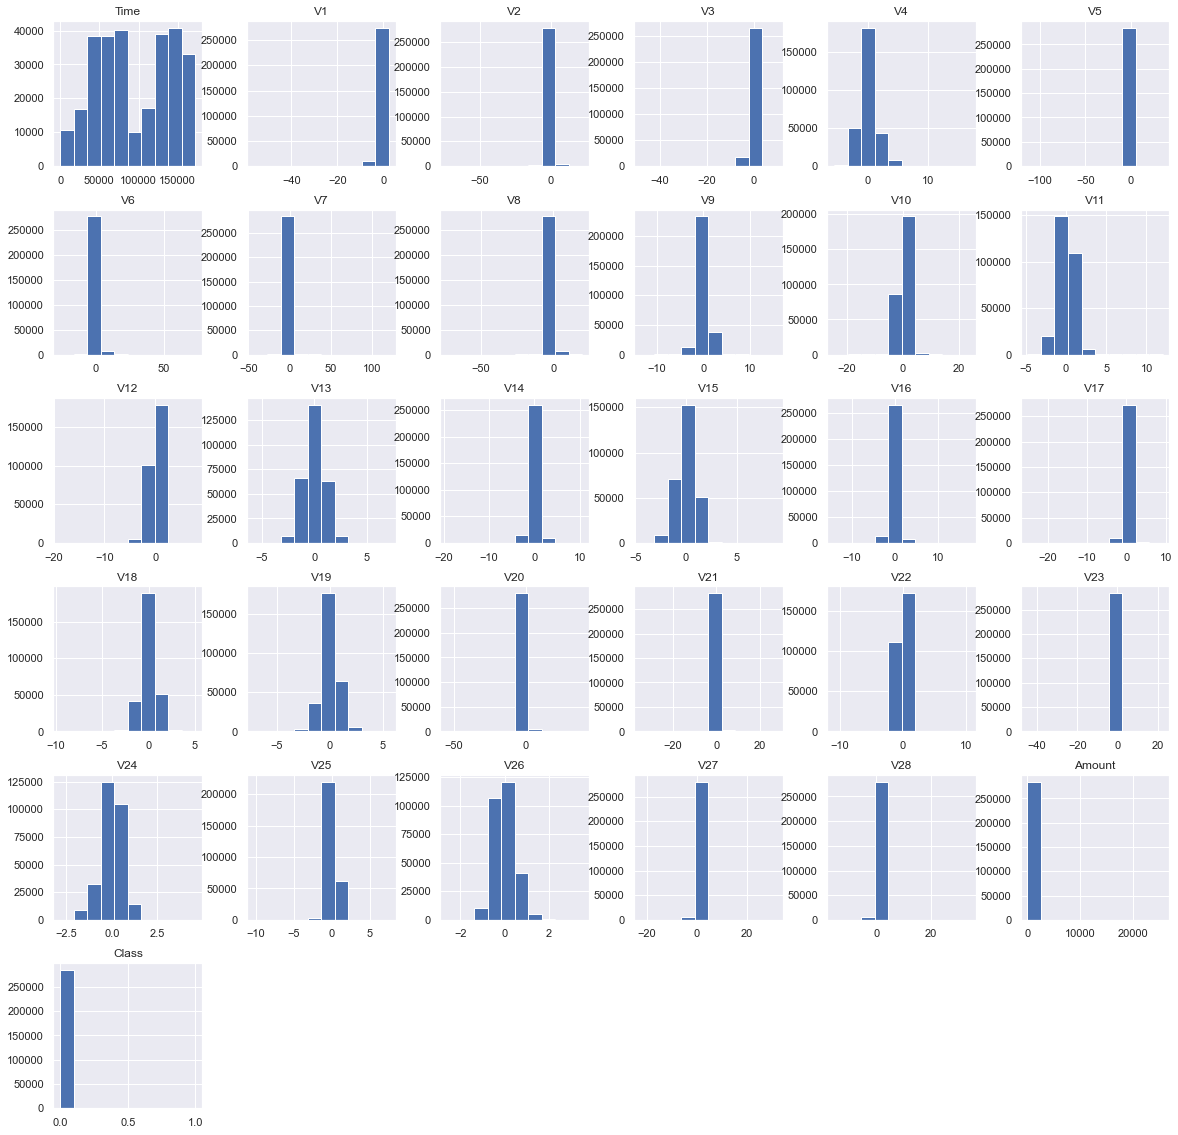

In [9]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

In [10]:
#sns.pairplot(df)

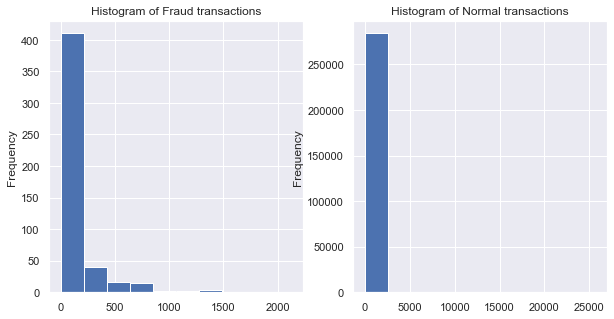

In [11]:
#Divide the dataset according to the label FraudTransactions and Normal Transactions
# Fraud means Class=1 and Normal means status =0
fraud=df.loc[df["Class"]==1]
normal=df.loc[df["Class"]==0]
plt.figure(figsize=(10,5))
plt.subplot(121)
fraud.Amount.plot.hist(title="Histogram of Fraud transactions")
plt.subplot(122)
normal.Amount.plot.hist(title="Histogram of Normal transactions")

Text(0.5, 1.0, 'Number of Transactions Per Class')

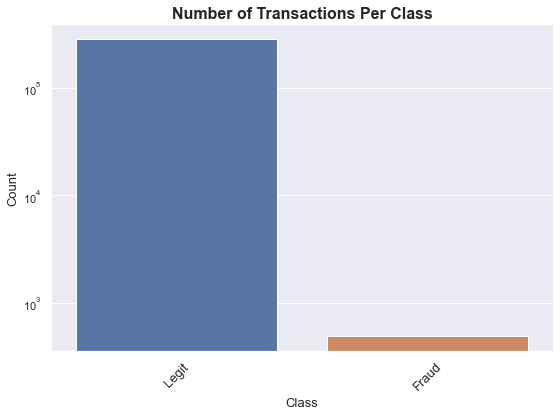

In [12]:
#FInding how many fraud and non fraud cases in entries
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(9,6)) 
ax.set_yscale('log') 
g = sns.countplot(x='Class', data=df, ax=ax) 
g.set_xticklabels(['Legit','Fraud']) 
plt.xticks(rotation = 45, fontsize = 13)
plt.xlabel('Class', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Number of Transactions Per Class', fontsize = 16, fontweight='bold')

<Figure size 1440x1440 with 0 Axes>

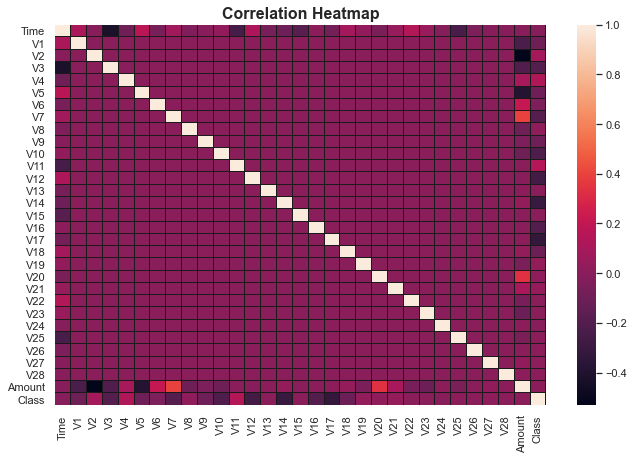

In [13]:
# ### Corelation Heatmap
plt.figure(figsize=(20,20))
list_of_correlations= df.corr(method='pearson')
plt.figure(figsize=(11,7))
sns.heatmap(list_of_correlations,linewidths=0.005,linecolor='k')
plt.title('Correlation Heatmap', fontsize = 16, fontweight='bold')
plt.show()

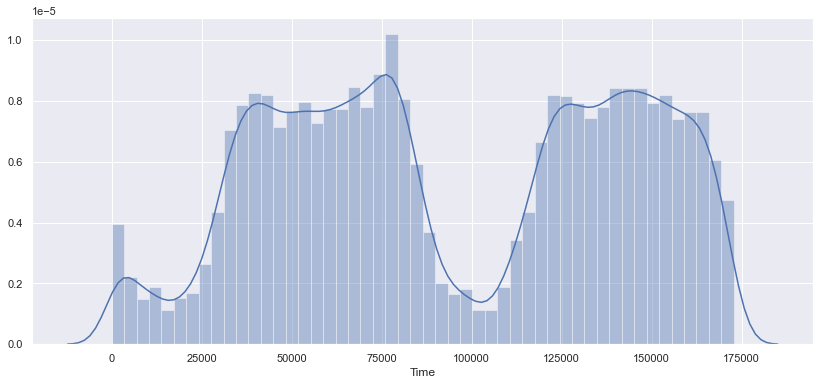

In [14]:
plt.figure(figsize=(14,6))
sns.distplot(df['Time'])

In [15]:
a=np.abs(list_of_correlations['Class']).sort_values(ascending=False).head(5)
print(a)

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
Name: Class, dtype: float64


In [16]:
fraction = df["Class"].value_counts()[1]/df["Class"].value_counts()[0]
fraction

0.0017304750013189597

In [17]:
#creating independent(features) and dependent(target) variables
X = df.drop(["Class", "Time"], axis = 1)
y = df["Class"]

In [18]:
#importing sklearn libraries
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

In [19]:
#Outlier detection using LOF
clf = LocalOutlierFactor(n_neighbors=20)
clf_pred=clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
print("clf:",clf_pred)
print("X scores:", X_scores)

clf: [1 1 1 ... 1 1 1]
X scores: [-1.00057324 -1.4494651  -1.16610611 ... -1.03392318 -1.10133601
 -1.0104542 ]


In [20]:
#applying IsolationForest 
algorithm = IsolationForest(behaviour='new',contamination=fraction,random_state=42)
algorithm.fit(X)
scores_prediction = algorithm.decision_function(X)
y_pred=algorithm.predict(X)
print("y_pred:",y_pred)
print("Scores_prediction:",scores_prediction)

C:\Users\91986\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:252: FutureWarning:

'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.



y_pred: [1 1 1 ... 1 1 1]
Scores_prediction: [0.283029   0.30035185 0.21107965 ... 0.25611877 0.2348405  0.28550027]


In [21]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = .2,min_samples = 5,n_jobs = -1)
clusters = outlier_detection.fit_predict(X)
print("cluster:",clusters)

cluster: [-1 -1 -1 ... -1 -1 -1]


In [22]:
(y_pred.min(), y_pred.max())

(-1, 1)

In [23]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
print(n_errors)

707


In [24]:
#accuracy of modal
print("Accuracy Score :",accuracy_score(y,y_pred))

Accuracy Score : 0.9975176171933976


In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)

[[283961    354]
 [   353    139]]


# The End